Importing the required libraries

In [49]:
import pandas as pd
import numpy as np
import re
import collections
import contractions
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import keras
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

Importing the SMS spam detection dataset

In [50]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [51]:
df.shape 

(5572, 5)

In [52]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)

In [53]:
df.columns = ["SpamHam","Tweet"]

<AxesSubplot:xlabel='SpamHam', ylabel='count'>

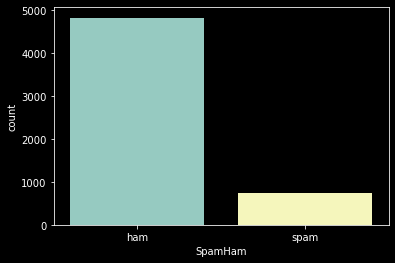

In [54]:
sns.countplot(df["SpamHam"])

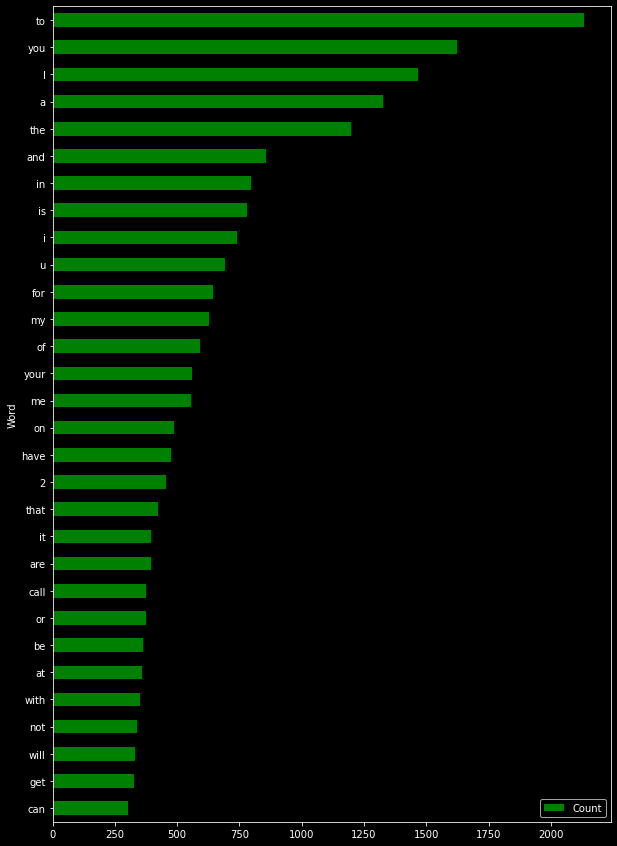

In [55]:
def word_count_plot(df):
     
     word_counter = collections.Counter([word for sentence in df for word in sentence.split()])
     most_count = word_counter.most_common(30) 

     most_count = pd.DataFrame(most_count, columns=["Word", "Count"]).sort_values(by="Count")
     most_count.plot.barh(x = "Word", y = "Count", color="green", figsize=(10, 15))
word_count_plot(df["Tweet"])

In [56]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Preprocessing - lemmatization

In [57]:
lem = WordNetLemmatizer()
def preprocessing(df):
      sms = contractions.fix(df) 
      sms = sms.lower() 
      sms = re.sub(r'https?://S+|www.S+', "", sms).strip() 
      sms = re.sub("[^a-z ]", "", sms) 
      sms = sms.split() 
     
      sms = [lem.lemmatize(word) for word in sms if not word in set(stopwords.words("english"))]
      sms = " ".join(sms)
      return sms



Encoding the data

In [58]:
from sklearn.preprocessing import LabelEncoder
lb_enc = LabelEncoder()
y = lb_enc.fit_transform(df["SpamHam"])

Tokenizing our data and converting it into a numerical sequence

In [59]:
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(X)
text_to_sequence = tokenizer.texts_to_sequences(X) 

In [60]:
for i in range(5):
           print("Text               : ",X[i] )
           print("Numerical Sequence : ", text_to_sequence[i])

Text               :  Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Numerical Sequence :  [50, 469, 4410, 841, 751, 657, 64, 8, 1324, 89, 121, 349, 1325, 147, 2987, 1326, 67, 58, 4411, 144]
Text               :  Ok lar... Joking wif u oni...
Numerical Sequence :  [46, 336, 1495, 470, 6, 1929]
Text               :  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Numerical Sequence :  [47, 486, 8, 19, 4, 796, 899, 2, 178, 1930, 1199, 658, 1931, 2320, 267, 2321, 71, 1930, 2, 1932, 2, 337, 486, 554, 955, 73, 388, 179, 659, 389, 2988]
Text               :  U dun say so early hor... U c already then say...
Numerical Sequence :  [6, 245, 152, 23, 379, 2989, 6, 140, 154, 57, 152]
Text               :  Nah I don't think he goes to usf, he lives around here though
Numerical Sequence :  [1018, 1, 98, 107, 69, 487, 2, 956, 69,

Find the index number of the corresponding words

In [61]:
tokenizer.index_word 

{1: 'i',
 2: 'to',
 3: 'you',
 4: 'a',
 5: 'the',
 6: 'u',
 7: 'and',
 8: 'in',
 9: 'is',
 10: 'me',
 11: 'my',
 12: 'for',
 13: 'your',
 14: 'it',
 15: 'of',
 16: 'call',
 17: 'have',
 18: 'on',
 19: '2',
 20: 'that',
 21: 'now',
 22: 'are',
 23: 'so',
 24: 'but',
 25: 'not',
 26: 'or',
 27: 'do',
 28: 'can',
 29: 'at',
 30: "i'm",
 31: 'get',
 32: 'be',
 33: 'will',
 34: 'if',
 35: 'ur',
 36: 'with',
 37: 'just',
 38: 'no',
 39: 'we',
 40: 'this',
 41: 'gt',
 42: '4',
 43: 'lt',
 44: 'up',
 45: 'when',
 46: 'ok',
 47: 'free',
 48: 'from',
 49: 'how',
 50: 'go',
 51: 'all',
 52: 'out',
 53: 'what',
 54: 'know',
 55: 'like',
 56: 'good',
 57: 'then',
 58: 'got',
 59: 'was',
 60: 'come',
 61: 'its',
 62: 'am',
 63: 'time',
 64: 'only',
 65: 'day',
 66: 'love',
 67: 'there',
 68: 'send',
 69: 'he',
 70: 'want',
 71: 'text',
 72: 'as',
 73: 'txt',
 74: 'one',
 75: 'going',
 76: 'by',
 77: 'home',
 78: "i'll",
 79: 'need',
 80: 'about',
 81: 'r',
 82: 'lor',
 83: 'sorry',
 84: 'stop',
 85:

In [62]:
max_length_sequence = max([len(i) for i in text_to_sequence])

padded_sms_sequence = pad_sequences(text_to_sequence, maxlen=max_length_sequence, 
                                    padding = "pre") 
padded_sms_sequence

array([[   0,    0,    0, ...,   58, 4411,  144],
       [   0,    0,    0, ...,  470,    6, 1929],
       [   0,    0,    0, ...,  659,  389, 2988],
       ...,
       [   0,    0,    0, ...,  105,  250, 8919],
       [   0,    0,    0, ...,  200,   12,   47],
       [   0,    0,    0, ...,    2,   61,  268]])

Create model and add layers

In [63]:
TOT_SIZE = len(tokenizer.word_index)+1
def create_model():
    
      lstm_model = Sequential()
      lstm_model.add(Embedding(TOT_SIZE, 32, input_length=max_length_sequence))
      lstm_model.add(LSTM(100))
      lstm_model.add(Dropout(0.4))
      lstm_model.add(Dense(20, activation="relu"))
      lstm_model.add(Dropout(0.3))
      lstm_model.add(Dense(1, activation = "sigmoid"))
      return lstm_model
lstm_model = create_model()
lstm_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [64]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 189, 32)           285472    
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 20)                2020      
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 340,713
Trainable params: 340,713
Non-tr

Fit the model

In [65]:
lstm_model.fit(padded_sms_sequence, y, epochs = 5, validation_split=0.2, batch_size=16)

Epoch 1/5
279/279 [==============================] - 38s 118ms/step - loss: 0.1489 - accuracy: 0.9554 - val_loss: 0.0958 - val_accuracy: 0.9785
Epoch 2/5
279/279 [==============================] - 30s 109ms/step - loss: 0.0397 - accuracy: 0.9915 - val_loss: 0.0436 - val_accuracy: 0.9874
Epoch 3/5
279/279 [==============================] - 31s 109ms/step - loss: 0.0122 - accuracy: 0.9978 - val_loss: 0.0642 - val_accuracy: 0.9848
Epoch 4/5
279/279 [==============================] - 30s 109ms/step - loss: 0.0070 - accuracy: 0.9989 - val_loss: 0.0569 - val_accuracy: 0.9901
Epoch 5/5
279/279 [==============================] - 30s 109ms/step - loss: 0.0079 - accuracy: 0.9984 - val_loss: 0.0633 - val_accuracy: 0.9830


Saving the model

In [66]:
lstm_model.save('Spam_message_classifier.h5')

Test the model

In [67]:
X = df.Tweet
Y = df.SpamHam
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)
max_words = 1000
max_len = 150

In [69]:
test_sequences=tok.texts_to_sequences(X_test)
test_sequences_matrix=pad_sequences(test_sequences,maxlen=max_len)

In [70]:
accuracy = lstm_model.evaluate(test_sequences_matrix,Y_test)

27/27 [==============================] - 2s 30ms/step - loss: 0.8163 - accuracy: 0.8481
